In [6]:
import numpy as np
import sys
sys.path.append('..')
from data_sets import SynData
import matplotlib.pyplot as plt
from syn_data_functionality.gen_input_from_label import *
import skimage.io
from scipy.stats import norm

In [7]:
#synDat = SynData("syn_data/syn_input", "syn_data/syn_label")
#
#img, lab = synDat[0]
#
#data = lab[0].numpy()
#print(data.shape)
#plt.imshow(data)

In [8]:
#arr = np.array(data.copy()).astype(float)
##print(arr)
#bc, ac = gen_colors()
##print(bc)
#arr[data == 1] = ac#/255
##print(arr)
#arr[data == 0] = bc#/255
##print(arr)
#plt.imshow(arr, vmax=255, vmin=0, cmap="gray")

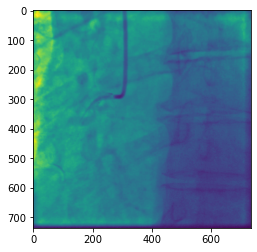

In [72]:
path_dat = r"Z:\dikuAngiograms\Data\02\ImsegmentedPt_02 V_4\ImsegmentedPt_02 V_4\Orig\IMG00004_33.tiff"
path_dat6 = r"Z:\dikuAngiograms\Data\02\ImsegmentedPt_02 V_6\ImsegmentedPt_02 V_6\Orig\IMG00006_02.tiff"
path_dat0 = r"Z:\dikuAngiograms\Data\02\ImsegmentedPt_02 V_0\Orig\IMG00000_07.tiff"
#r"../../../Orig_data/ImsegmentedPt_02 V_4/IMG00004_33.tiff"

act_dat6 = np.array(skimage.io.imread(path_dat6))
act_dat = np.array(skimage.io.imread(path_dat))
img_0_07 = np.array(skimage.io.imread(path_dat0))

plt.imshow(img_0_07)

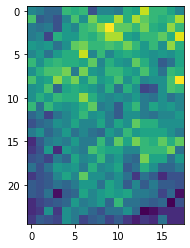

131
155
18.629111531190922


In [96]:
#zoom in!
plt.imshow(img_0_07[610+20:610+40, 20+2:20+25])
plt.show()
print(np.min(img_0_07[610+20:610+45, 20+2:20+25]))
print(np.max(img_0_07[610+20:610+45, 20+2:20+25]))
print(np.var(img_0_07[610+20:610+45, 20+2:20+25]))
#plt.imshow(act_dat[300:400, 50: 150])
#plt.show()
#plt.imshow(act_dat[20:100, 450: 530])
#plt.show()
#plt.imshow(act_dat[50:110, 100: 160])
#plt.show()
#print(np.var(act_dat6[320:340, 380:400]))

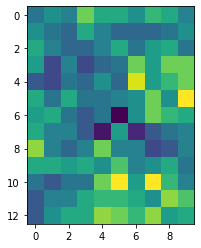

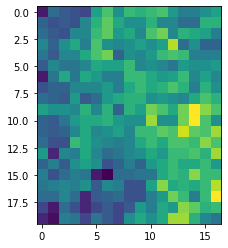

In [11]:
#Find even patches

plt.imshow(act_dat[300+30:300+43, 50+55: 50+65])
plt.show()
plt.imshow(act_dat[300+30:300+50, 50+5: 50+22])
plt.show()

In [12]:
def findPatchMeanAndStd(patch):
    mean = np.mean(patch)
    return mean

p1 = act_dat[50+35:110-10, 100: 160-30]
p2 = act_dat[55:62, 110: 130]
p3 = act_dat[65:72, 140: 150]

p4 = act_dat[20+12:20+30, 450+5: 450+18]
p5 = act_dat[300+30:300+43, 50+55: 50+65]
p6 = act_dat[300+30:300+50, 50+5: 50+22]

pFlat = np.concatenate(((p1.flatten() - np.mean(p1)), (p2.flatten()-np.mean(p2)),(p3.flatten() - np.mean(p3)), (p4.flatten() - np.mean(p4)), (p5.flatten() - np.mean(p5)), (p6.flatten() - np.mean(p6))))
#pFlat = np.concatenate((p1.flatten(), p2.flatten(),p3.flatten() ,p4.flatten() ,p5.flatten() , p6.flatten()))
#plt.hist(pFlat)
#plt.show()
print(np.var(pFlat)) #k in poisson noise

20.784827728143668


(array([  3.,   7.,   6.,   3.,  15.,  26.,  24.,  56.,  60.,  73.,  80.,
        120., 121., 125., 125.,  97., 102.,  78.,  83.,  58.,  27.,  23.,
         20.,   9.,   8.,   8.,   3.,   3.,   0.,   1.]),
 array([-14.23235294, -13.20224317, -12.1721334 , -11.14202363,
        -10.11191386,  -9.08180409,  -8.05169432,  -7.02158455,
         -5.99147478,  -4.96136501,  -3.93125524,  -2.90114547,
         -1.8710357 ,  -0.84092593,   0.18918384,   1.21929361,
          2.24940339,   3.27951316,   4.30962293,   5.3397327 ,
          6.36984247,   7.39995224,   8.43006201,   9.46017178,
         10.49028155,  11.52039132,  12.55050109,  13.58061086,
         14.61072063,  15.6408304 ,  16.67094017]),
 <a list of 30 Patch objects>)

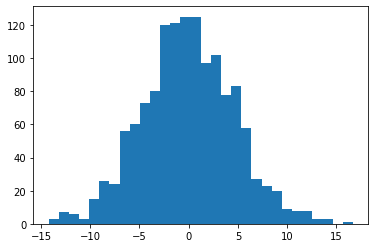

In [13]:
plt.hist(pFlat, bins=30)

In [14]:
from scipy.stats import norm
from numpy import exp
from scipy.optimize import curve_fit, Bounds
from scipy.stats import exponnorm
import scipy.special as sse

hist, bin_edges = np.histogram(p1.flatten() - np.mean(p1))
print(hist)
hist=hist#/sum(hist)

n = len(hist)
x_hist=np.zeros((n),dtype=float)
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

y_hist=hist

def gaus(X,C,X_mean,sigma):
    return C*exp(-(X-X_mean)**2/(2*sigma**2))

mean = sum(x_hist*y_hist)/sum(y_hist)
sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist)

print(mean)
print(sigma)

#param_optimised, param_covariance_matrix = curve_fit(gaus,x_hist, y_hist,bounds=(-16, 16))
#hist, bin_edges = np.histogram(pFlat)
#mean = np.mean(pFlat)
#var = np.var(pFlat)
#
#print(mean)
#print(std)
#
#pdf_x = np.linspace(np.min(pFlat),np.max(pFlat),100)
#pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)
#
## Then we plot :
#plt.figure()
##plt.hist(pFlat)
#plt.plot(pdf_x,pdf_y)
#plt.legend(("Fit","Data"),"best")
#plt.show()
#

[  5  15  40  56 119  81  88  26  15   5]
0.275555555555554
18.839166666666667
